In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
df=pd.read_csv("../data/new_data.csv")
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,2,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,3,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0.0,2,0


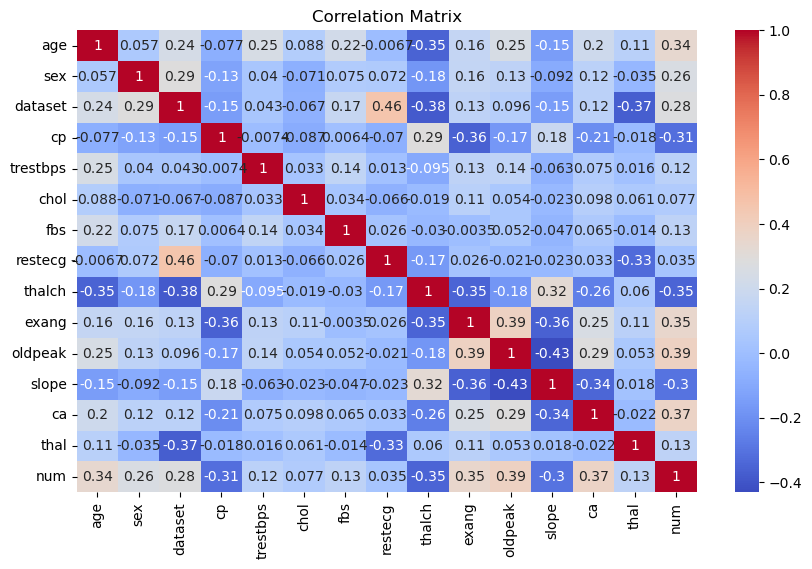

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [6]:
# 1. اختار الـ Features الرقمية
X = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]  # أعمدة رقمية
y = df['num']  # التارجت

# 2. طبق ANOVA F-test
f_scores, p_values = f_classif(X, y)

# 3. حط النتائج في جدول منظم
anova_result = pd.DataFrame({
    'Feature': X.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

print(anova_result)


    Feature    F-score       p-value
4   oldpeak  48.765318  3.269676e-37
3    thalch  42.538879  9.425971e-33
0       age  31.226059  2.106209e-24
1  trestbps   3.536935  7.122220e-03
2      chol   2.885065  2.166196e-02


ANOVA F-test Results:
    Feature    F-score       p-value
4   oldpeak  48.765318  3.269676e-37
3    thalch  42.538879  9.425971e-33
0       age  31.226059  2.106209e-24
1  trestbps   3.536935  7.122220e-03
2      chol   2.885065  2.166196e-02


([0, 1, 2, 3, 4],
 [Text(0, 0, 'oldpeak'),
  Text(1, 0, 'thalch'),
  Text(2, 0, 'age'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol')])

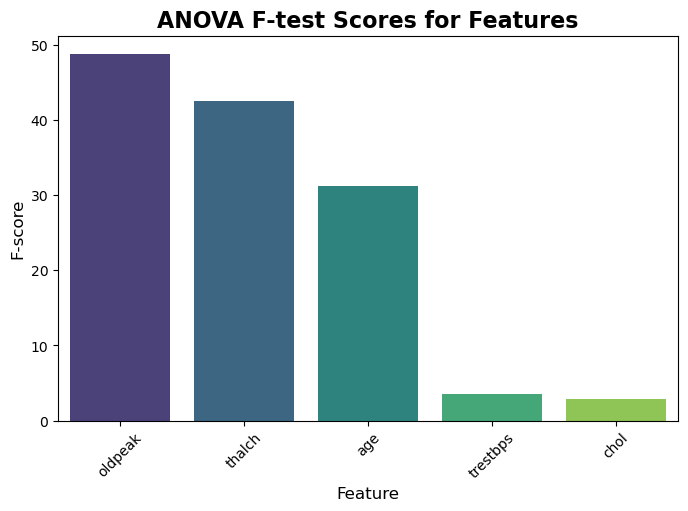

In [7]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']  # الأعمدة الرقمية
X = df[num_cols]
y = df['num']

# 2. طبق ANOVA F-test
f_scores, p_values = f_classif(X, y)

# 3. جهز النتائج في DataFrame منظم
anova_result = pd.DataFrame({
    'Feature': X.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

print("ANOVA F-test Results:")
print(anova_result)

# 4. Visualization للـ F-scores
plt.figure(figsize=(8,5))
sns.barplot(x='Feature', y='F-score', data=anova_result, palette='viridis')
plt.title("ANOVA F-test Scores for Features", fontsize=16, fontweight='bold')
plt.xlabel("Feature", fontsize=12)
plt.ylabel("F-score", fontsize=12)
plt.xticks(rotation=45)

In [8]:
x= df.drop(columns=['num'])  # احذف الأعمدة غير الرقمية
y= df['num']  # التارجت

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [12]:
x_train= pd.DataFrame(x_train, columns=x.columns)
x_train.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0.902413,0.505937,1.564762,-0.818287,0.115083,-1.663391,-0.401103,1.602169,-0.688840,1.321465,2.340698,0.315290,-0.316270,-0.659024
1,0.034776,0.505937,-0.207030,1.272892,1.278131,-0.951280,-0.401103,0.029907,-0.609629,-0.756736,-0.913883,0.315290,-0.316270,-0.659024
2,-0.290587,0.505937,1.564762,1.272892,0.115083,2.467927,-0.401103,0.029907,0.006064,-0.756736,0.039479,0.315290,-0.316270,-0.659024
3,-0.399042,-1.976529,-1.092926,1.272892,-0.674647,-0.465553,-0.401103,0.029907,0.816167,-0.756736,0.821894,-0.784489,-1.195771,0.501363
4,-0.182133,0.505937,-1.092926,0.227302,-0.674647,2.125688,-0.401103,0.029907,1.370643,-0.756736,-0.696911,1.415068,-1.195771,0.501363


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)
rfe.fit(x_train, y_train)

print("Selected Features:", x_train.columns[rfe.support_])


Selected Features: Index(['age', 'dataset', 'cp', 'oldpeak', 'ca', 'thal'], dtype='object')
